El indicador mide el valor en dólares de las exportaciones agropecuarias no tradicionales y tradicionales

In [1]:
import pandas as pd
import numpy as np
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoSeries
from shapely.geometry import Polygon
import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.1 MB/s 
     |████████████████████████████████| 16.7 MB 266 kB/s 
     |████████████████████████████████| 6.3 MB 16.9 MB/s 


Alimentos del trópico para alimentación animal - AlimenTro
La fuente del dataset es la página gubernamental www.datos.gov.co.

In [2]:
import seaborn as sns

In [3]:
##Instalación de libreria especial para trabajar con los datos
!pip install sodapy
import sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sodapy import Socrata
client = Socrata("www.datos.gov.co", None)

In [5]:
base = client.get_all("gaic-b8aw")

In [6]:
df = pd.DataFrame.from_records(base)

In [7]:
df.shape

(106888, 13)

In [8]:
df.sample(5)

,fecha,fecha_corte,a_o,mes,departamento,cod_depto,producto,descripcion_partida4_dig,descripcion_partida4_dig_1,partida,tradici_n_producto,exportaciones_en_valor_usd,exportaciones_en_volumen
94783,2021-12-03T00:00:00.000,2021-06-30T00:00:00.000,2021,Junio,Valle del Cauca,76,Semillas de legumbres y hortalizas,"1209-Semillas, frutos y esporas, para siembra.","Las demás semillas de hortalizas, para siembra.",1209919000,No tradicional,0,0
33356,2021-12-03T00:00:00.000,2019-04-30T00:00:00.000,2019,Abril,Bolívar,13,Chicles y demás gomas de mascar,1704-Artículos de confitería sin cacao (inclui...,Los demás chicles y demás gomas de mascar.,1704109000,No tradicional,0,0
102037,2021-12-03T00:00:00.000,2018-08-31T00:00:00.000,2018,Agosto,Antioquia,5,Flores,"0603-Flores y capullos, cortados para ramos o ...","Orquídeas frescas, cortadas para ramos o adornos.",603130000,Tradicional,1,0
48338,2021-12-03T00:00:00.000,2019-11-30T00:00:00.000,2019,Noviembre,Antioquia,5,Avena,1104-Granos de cereales trabajados de otro mod...,Granos de avena aplastados o en copos.,1104120000,No tradicional,2,2
43868,2021-12-03T00:00:00.000,2019-09-30T00:00:00.000,2019,Septiembre,Antioquia,5,"Sopas, caldos","2104-Preparaciones para sopas, potajes o caldo...","Preparaciones para sopas, potajes o caldos.",2104101000,No tradicional,5,1


In [9]:
df.dtypes

fecha                         object
fecha_corte                   object
a_o                           object
mes                           object
departamento                  object
cod_depto                     object
producto                      object
descripcion_partida4_dig      object
descripcion_partida4_dig_1    object
partida                       object
tradici_n_producto            object
exportaciones_en_valor_usd    object
exportaciones_en_volumen      object
dtype: object

AJUSTE DE FORMATOS

In [10]:
##cambiar formato de fecha para el campo fechaanalisis
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha_corte'] = pd.to_datetime(df['fecha_corte'])
df['fecha_corte']

0        2018-01-31
1        2018-01-31
2        2018-01-31
3        2018-01-31
4        2018-01-31
            ...    
106883   2021-09-30
106884   2021-09-30
106885   2021-09-30
106886   2021-09-30
106887   2021-09-30
Name: fecha_corte, Length: 106888, dtype: datetime64[ns]

In [11]:
##Cambiar formato a los numeros
df.fillna(0)
df['exportaciones_en_valor_usd'] = pd.to_numeric(df['exportaciones_en_valor_usd'] )
df['exportaciones_en_volumen'] = pd.to_numeric(df['exportaciones_en_volumen'] )

Crear nuevas columnas con los datos de fecha y hora

In [12]:
df['Mes'] = df['fecha_corte'].dt.month
df['Año'] = df['fecha_corte'].dt.year

In [13]:
##Reemplazar valores na por 0
df.fillna(0)
df.columns

Index(['fecha', 'fecha_corte', 'a_o', 'mes', 'departamento', 'cod_depto',
       'producto', 'descripcion_partida4_dig', 'descripcion_partida4_dig_1',
       'partida', 'tradici_n_producto', 'exportaciones_en_valor_usd',
       'exportaciones_en_volumen', 'Mes', 'Año'],
      dtype='object')

Cuales son los departamentos que más exportan en dolares

In [14]:
EXPOYEAR = df[df['Año']!=2021].groupby(['Año'])[['exportaciones_en_valor_usd','exportaciones_en_volumen']].sum().sort_values(by = ['Año'], ascending = True) ##No se tiene en cuenta año 2021

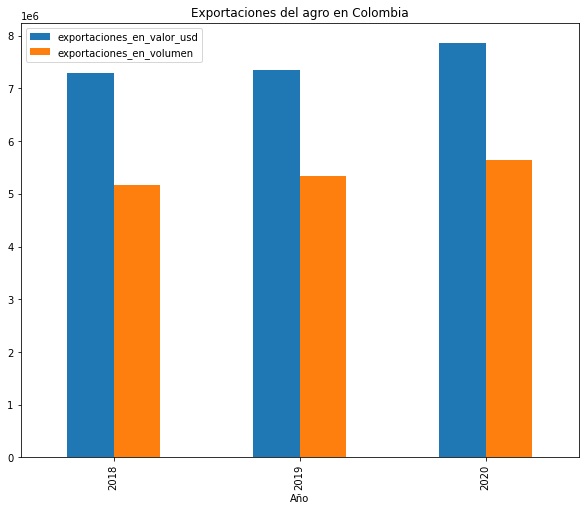

,exportaciones_en_valor_usd,exportaciones_en_volumen
Año,,
2018,7286253,5166734
2019,7340137,5346774
2020,7856040,5644042


In [15]:
#plt.figure(figsize=(20,7))
#plt.grid(False)
EXPOYEAR.plot(kind="bar",stacked=False,figsize=(10,8))
#gr1 = plt.bar(EXPOYEAR['Año'],EXPOYEAR['exportaciones_en_valor_usd'], color = 'green')
#gr2 = plt.bar(EXPOYEAR['Año'],EXPOYEAR['exportaciones_en_volumen'], color = 'blue')
plt.title('Exportaciones del agro en Colombia')
#plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()
EXPOYEAR

In [16]:
EXPODEP = df[df['Año']==2020].groupby(['departamento'])[['exportaciones_en_valor_usd']].sum().reset_index().sort_values(by = ['exportaciones_en_valor_usd'], ascending = False).head(15)

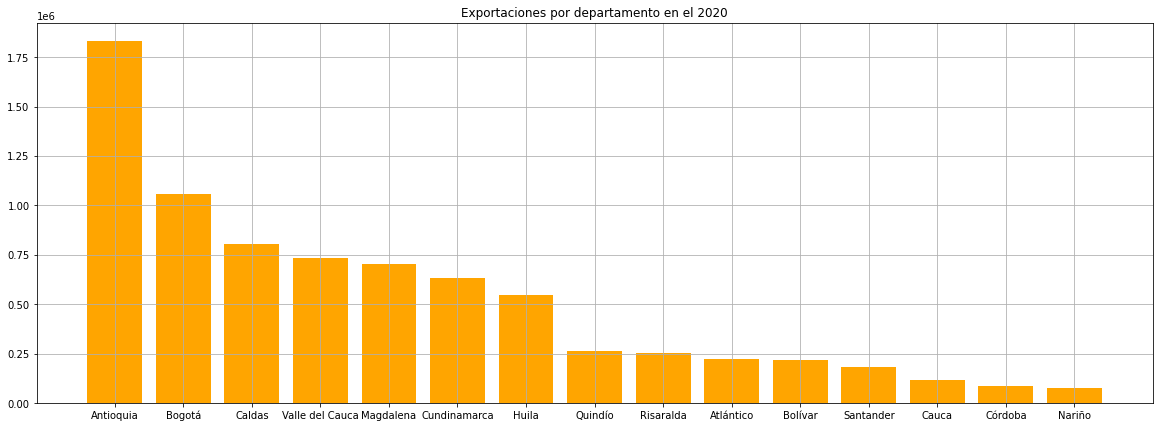

,departamento,exportaciones_en_valor_usd
1,Antioquia,1831829
3,Bogotá,1059923
6,Caldas,804100
26,Valle del Cauca,734286
15,Magdalena,702246
11,Cundinamarca,635015
13,Huila,546656
20,Quindío,264758
21,Risaralda,255250
2,Atlántico,224394


In [17]:
plt.figure(figsize=(20,7))
plt.grid(True)
gr1 = plt.bar(EXPODEP['departamento'],EXPODEP['exportaciones_en_valor_usd'], color = 'orange')
plt.title('Exportaciones por departamento en el 2020')
plt.show()
EXPODEP

In [18]:
df.columns

Index(['fecha', 'fecha_corte', 'a_o', 'mes', 'departamento', 'cod_depto',
       'producto', 'descripcion_partida4_dig', 'descripcion_partida4_dig_1',
       'partida', 'tradici_n_producto', 'exportaciones_en_valor_usd',
       'exportaciones_en_volumen', 'Mes', 'Año'],
      dtype='object')

Cuáles fuerón los productos más exportados en el 2020 en dolares

In [19]:
Product2020 = df[df['Año']==2020].groupby(['producto'])[['exportaciones_en_valor_usd']].sum().sort_values(by = ['exportaciones_en_valor_usd'], ascending = False).head(10)

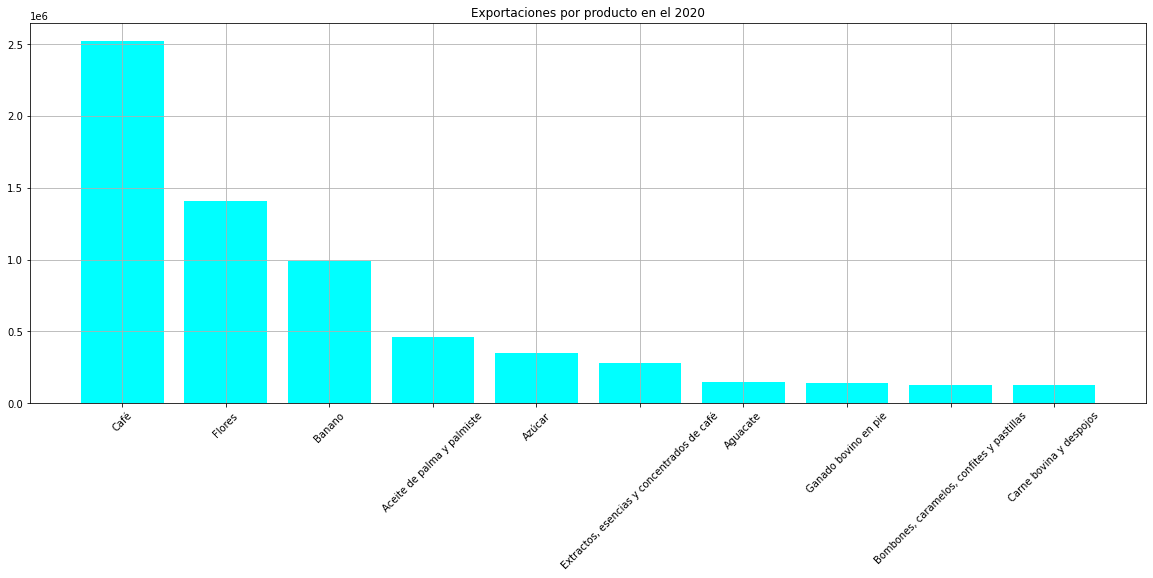

,exportaciones_en_valor_usd
producto,
Café,2522875
Flores,1410699
Banano,990330
Aceite de palma y palmiste,460107
Azúcar,347493
"Extractos, esencias y concentrados de café",279325
Aguacate,146028
Ganado bovino en pie,143850
"Bombones, caramelos, confites y pastillas",126356


In [20]:
plt.figure(figsize=(20,7))
plt.grid(True)
gr2 = plt.bar(Product2020.index ,Product2020['exportaciones_en_valor_usd'], color = 'cyan')
plt.xticks(rotation = 45)
plt.title('Exportaciones por producto en el 2020')
plt.show()
Product2020

In [21]:
df.head()

,fecha,fecha_corte,a_o,mes,departamento,cod_depto,producto,descripcion_partida4_dig,descripcion_partida4_dig_1,partida,tradici_n_producto,exportaciones_en_valor_usd,exportaciones_en_volumen,Mes,Año
0,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Caballos,"0101-Caballos, asnos, mulos y burdéganos, vivos.","Caballos reproductores de raza pura, vivos",101210000,No tradicional,9,2,1,2018
1,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Porcinos,0103-Animales vivos de la especia porcina.,Animales vivos de la especie porcina de raza p...,103920000,No tradicional,0,0,1,2018
2,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Animales vivos,0106-Los demás animales vivos.,Los demás mamíferos vivos,106190000,No tradicional,150,4,1,2018
3,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Carne bovina y despojos,"0201-Carne de animales de la especie bovina, f...",Cortes finos de carne de animales de la especi...,201300010,No tradicional,307,45,1,2018
4,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Carne bovina y despojos,"0201-Carne de animales de la especie bovina, f...",Las demás carnes de animales de la especie bov...,201300090,No tradicional,1077,256,1,2018


In [22]:
df2020 = df[(df['Año']==2020)]

In [23]:
df2020best = df[(df['Año']==2020) & (df.producto == 'Café') | (df.producto == 'Flores') | (df.producto == 'Banano') | (df.producto == 'Aceite de palma y palmiste') | (df.producto == 'Azúcar')| 
                (df.producto == 'Extractos, esencias y concentrados de café')  |  (df.producto == 'Aguacate')| (df.producto == 'Ganado bovino en pie')
                | (df.producto == 'Bombones, caramelos, confites y pastillas')| (df.producto == 'Carne bovina y despojos')]

In [24]:
df2 = pd.pivot_table(data=df2020best, columns = 'producto', values = 'exportaciones_en_valor_usd', index = 'Mes', aggfunc = np.sum)

In [25]:
df2

producto,Aceite de palma y palmiste,Aguacate,Azúcar,Banano,"Bombones, caramelos, confites y pastillas",Café,Carne bovina y despojos,"Extractos, esencias y concentrados de café",Flores,Ganado bovino en pie
Mes,,,,,,,,,,
1,129161,49274,106237,362628,33661,248644,30592,70990,439098,34176
2,136987,51264,103038,274056,56866,214396,40410,83141,616618,23698
3,189175,52954,111797,314589,52450,169428,48792,86566,641272,58598
4,202819,67092,108238,364772,50175,156461,44302,95183,476423,25606
5,262866,38237,72972,392632,38949,140592,26487,77031,708517,32818
6,263312,39297,54747,269491,45601,193686,33624,82137,514034,24774
7,140298,28676,87835,317018,60897,268831,45432,97254,458976,5130
8,172302,22102,111353,304212,52424,200573,50665,93332,429825,35438
9,129747,24176,124580,261408,52357,216610,51278,95443,386389,15694


In [26]:
df2.sum()

producto
Aceite de palma y palmiste                    1862934
Aguacate                                       455194
Azúcar                                        1180428
Banano                                        3560954
Bombones, caramelos, confites y pastillas      560520
Café                                          2522875
Carne bovina y despojos                        453270
Extractos, esencias y concentrados de café     976143
Flores                                        5619857
Ganado bovino en pie                           348133
dtype: int64

In [27]:
df2cor = df2.corr()

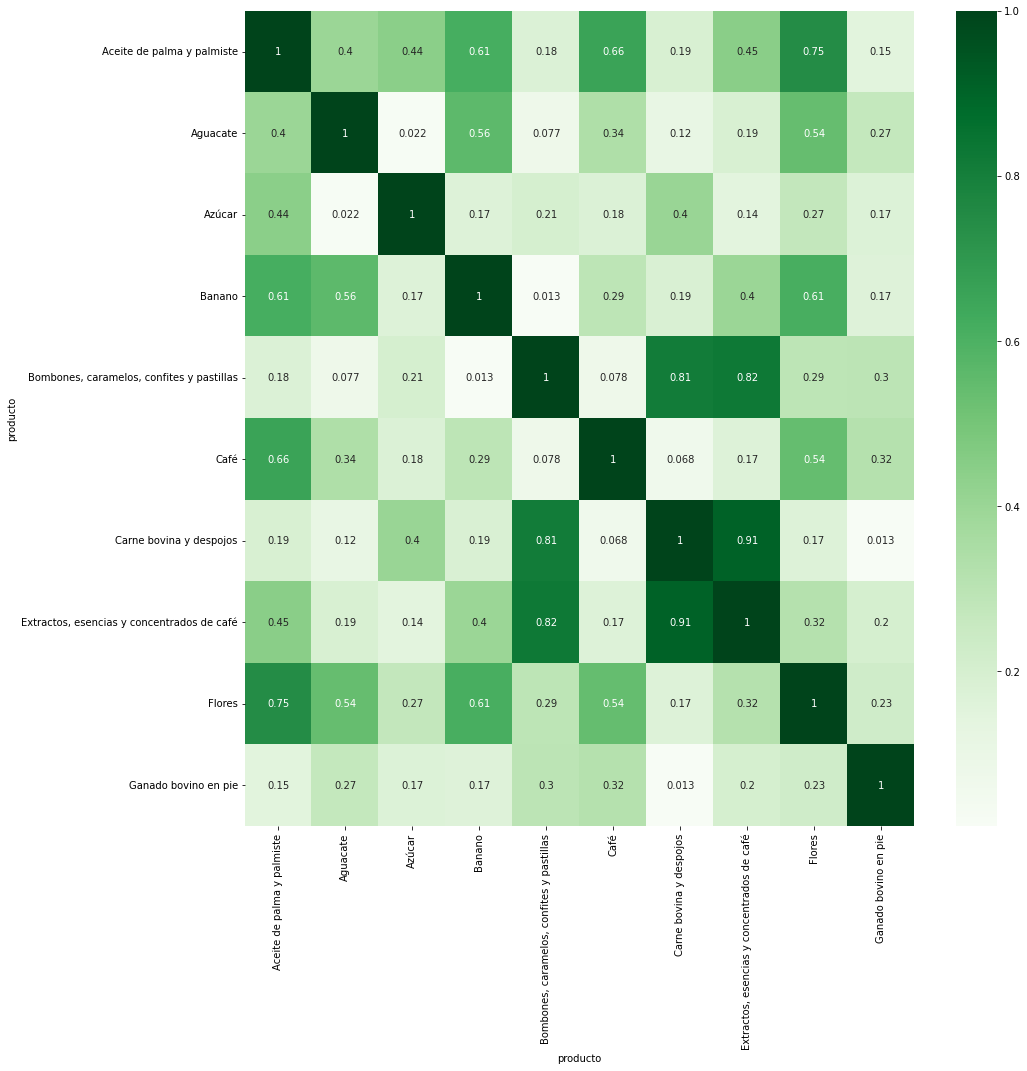

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(abs(df2cor),annot = True, cmap ='Greens')
plt.show()

Se quería comprobar si existe alguna correlación entre los meses de y los productos más exportados, aparentemente el modelo no muestra dicha relación  a excepción del aceite de palma y las Flores

BENFORT

In [29]:
def benfort(x):
  x = str(x)
  numbers = []
  numbers1 = []
  for i in (x):
    numbers.append(i)
  #print(numbers)
    for y in (numbers):
      if y in ['1','2','3','4','5','6','7','8','9','0']:
       numbers1.append(y)
  return(numbers1[0])

In [30]:
Product2020 = df[df['Año']==2020].groupby(['producto'])[['exportaciones_en_valor_usd']].sum().sort_values(by = ['exportaciones_en_valor_usd'], ascending = False).reset_index()

In [31]:
Product2020

,producto,exportaciones_en_valor_usd
0,Café,2522875
1,Flores,1410699
2,Banano,990330
3,Aceite de palma y palmiste,460107
4,Azúcar,347493
...,...,...
377,Jugo de una sola hortaliza,0
378,Aceite de babasu,0
379,Kiwis,0
380,Lana sin cardar ni peinar,0


In [32]:
Product2020['Benfort'] = [benfort(Product2020.loc[i,'exportaciones_en_valor_usd']) for i in Product2020.index]
Product2020.sample(10)

,producto,exportaciones_en_valor_usd,Benfort
294,Semillas de tabaco,0,0
380,Lana sin cardar ni peinar,0,0
87,Tortas y demás residuos sólidos de la extracci...,1368,1
86,Sorbitol,1392,1
45,Melaza de caña.,7814,7
199,Lactosa,30,3
346,Los demas cigalas.,0,0
88,Piñas,1311,1
109,Tortas y demás residuos sólidos de la extracci...,690,6
4,Azúcar,347493,3


In [33]:
dfbenfort = Product2020.groupby(['Benfort'])[['producto']].count().reset_index()

In [34]:
dfbenfort = dfbenfort.drop([0],axis=0)##eliminar el 0
dfbenfort

,Benfort,producto
1,1,80
2,2,52
3,3,33
4,4,29
5,5,18
6,6,17
7,7,14
8,8,14
9,9,18


In [35]:
dfbenfort['producto'].sum()

275

In [36]:
dfbenfort['Proporción'] = round((dfbenfort['producto']/dfbenfort['producto'].sum())*100,2)

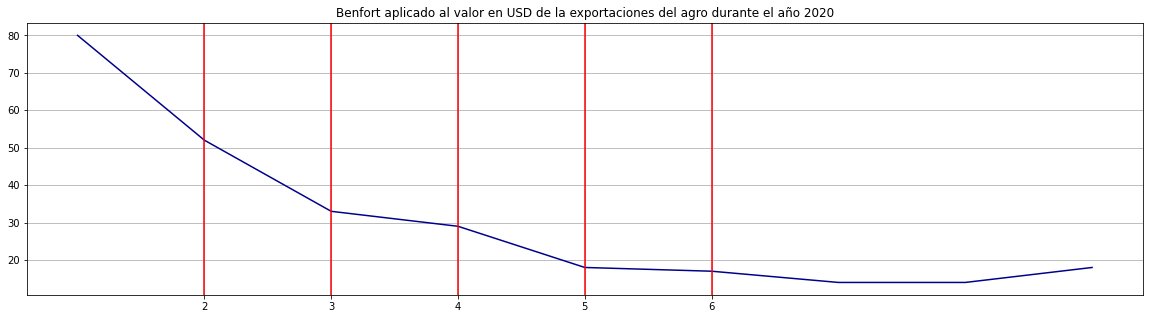

,Benfort,producto,Proporción
1,1,80,29.09
2,2,52,18.91
3,3,33,12.00
4,4,29,10.55
5,5,18,6.55
6,6,17,6.18
7,7,14,5.09
8,8,14,5.09
9,9,18,6.55


In [37]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dfbenfort['Benfort'],dfbenfort['producto'], color = 'darkblue' )##500particiones
plt.axvline(1, color = 'red')
plt.axvline(2, color = 'red')
plt.axvline(3, color = 'red')
plt.axvline(4, color = 'red')
plt.axvline(5, color = 'red')
plt.title('Benfort aplicado al valor en USD de la exportaciones del agro durante el año 2020')
plt.xticks([1,2,3,4,5])
plt.show()
dfbenfort

Se observa en la anterior gráfica que la ley de Benfort aplica para el dataset analizado, donde el valor 1 tiene una proporción del 29.09% con respecto al resto de números

EXPORTACIONES DE AGUACATE EN TONELADAS

In [38]:
Aguacate = df[df.producto == 'Aguacate']

In [39]:
Aguacate1 = pd.pivot_table(data = Aguacate, index = 'Mes', columns = 'Año', values = 'exportaciones_en_volumen', aggfunc= np.sum ).reset_index()
Aguacate1['Variación 2021'] = round(((Aguacate1[2021]-Aguacate1[2020])/Aguacate1[2020])*100,2)
Aguacate1['Variación 2020'] = round(((Aguacate1[2020]-Aguacate1[2019])/Aguacate1[2019])*100,2)
Aguacate1['Variación 2019'] = round(((Aguacate1[2019]-Aguacate1[2018])/Aguacate1[2018])*100,2)

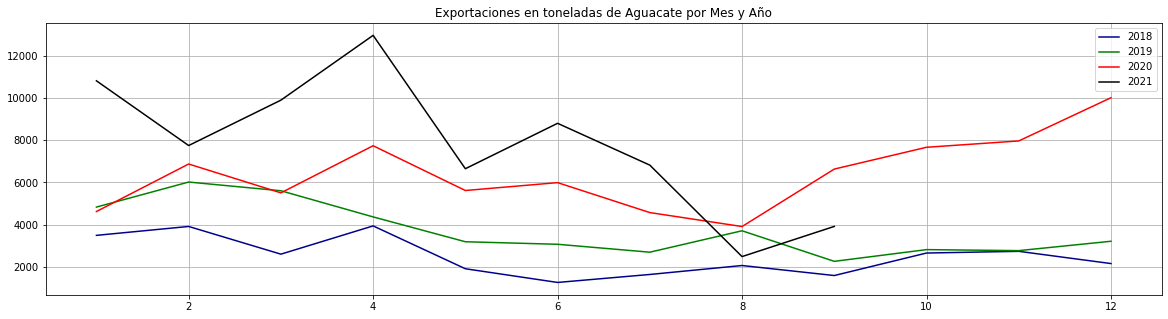

Año,Mes,2018,2019,2020,2021,Variación 2021,Variación 2020,Variación 2019
0,1,3495.0,4833.0,4622.0,10805.0,133.77,-4.37,38.28
1,2,3916.0,6017.0,6870.0,7744.0,12.72,14.18,53.65
2,3,2606.0,5604.0,5505.0,9890.0,79.65,-1.77,115.04
3,4,3942.0,4368.0,7734.0,12955.0,67.51,77.06,10.81
4,5,1916.0,3193.0,5617.0,6647.0,18.34,75.92,66.65
5,6,1268.0,3073.0,5989.0,8795.0,46.85,94.89,142.35
6,7,1645.0,2699.0,4573.0,6817.0,49.07,69.43,64.07
7,8,2069.0,3712.0,3912.0,2491.0,-36.32,5.39,79.41
8,9,1595.0,2266.0,6630.0,3918.0,-40.90,192.59,42.07
9,10,2659.0,2821.0,7661.0,NaN,NaN,171.57,6.09


In [40]:
plt.figure(figsize=(20,5))
plt.grid()
plt.title('Exportaciones en toneladas de Aguacate por Mes y Año')
plt.plot(Aguacate1['Mes'], Aguacate1[2018],color = 'darkblue',label = '2018')
plt.plot(Aguacate1['Mes'], Aguacate1[2019],color = 'green', label = '2019')
plt.plot(Aguacate1['Mes'], Aguacate1[2020],color = 'red', label = '2020')
plt.plot(Aguacate1['Mes'], Aguacate1[2021],color = 'black', label = '2021')
plt.legend()
plt.show()
Aguacate1

In [41]:
dfesp = Aguacate1[Aguacate1['Mes']<=9]

In [42]:
dfesp

Año,Mes,2018,2019,2020,2021,Variación 2021,Variación 2020,Variación 2019
0,1,3495.0,4833.0,4622.0,10805.0,133.77,-4.37,38.28
1,2,3916.0,6017.0,6870.0,7744.0,12.72,14.18,53.65
2,3,2606.0,5604.0,5505.0,9890.0,79.65,-1.77,115.04
3,4,3942.0,4368.0,7734.0,12955.0,67.51,77.06,10.81
4,5,1916.0,3193.0,5617.0,6647.0,18.34,75.92,66.65
5,6,1268.0,3073.0,5989.0,8795.0,46.85,94.89,142.35
6,7,1645.0,2699.0,4573.0,6817.0,49.07,69.43,64.07
7,8,2069.0,3712.0,3912.0,2491.0,-36.32,5.39,79.41
8,9,1595.0,2266.0,6630.0,3918.0,-40.90,192.59,42.07


In [43]:
round(((Aguacate1[2021].sum()-dfesp[2020].sum())/dfesp[2020].sum())*100,2)

36.17

Las exportaciones de aguacate han venido creciendo año a año, incluso si se compara los primeros 9 meses de 2021 contra el 2020, el aumento corresponde al 36.17%, y en la gráfica anterior se puede observar cómo las líneas que representan las toneladas de exportación anual se van superponiendo año tras año

In [44]:
print('Variación 2020 versus 2019: ',round(((Aguacate1[2020].sum()-Aguacate1[2019].sum())/Aguacate1[2019].sum())*100,2),"%")
print('Variación 2019 versus 2018: ',round(((Aguacate1[2019].sum()-Aguacate1[2018].sum())/Aguacate1[2018].sum())*100,2),"%")

Variación 2020 versus 2019:  72.92 %
Variación 2019 versus 2018:  48.52 %


Colombia en los últimos años ha mostrado un crecimiento, lo cuál se demuestra con las variaciones anuales del 2019 y 2020

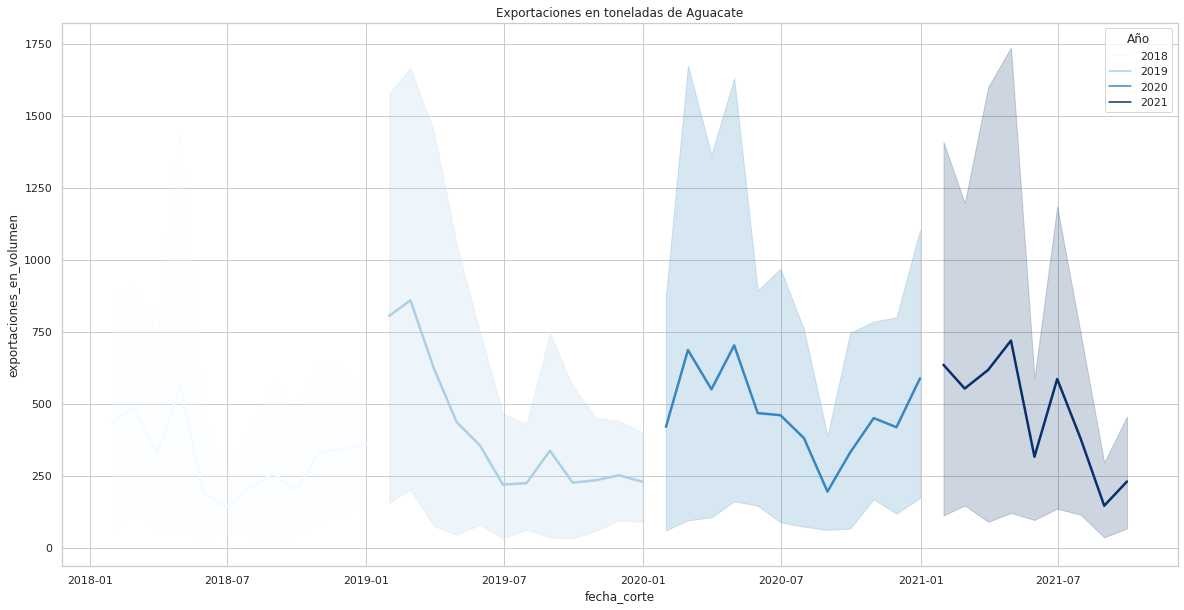

In [45]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.lineplot(x= 'fecha_corte',y = 'exportaciones_en_volumen' ,data=Aguacate, palette="Blues", linewidth=2.5, hue = 'Año')
plt.title('Exportaciones en toneladas de Aguacate')
plt.show()

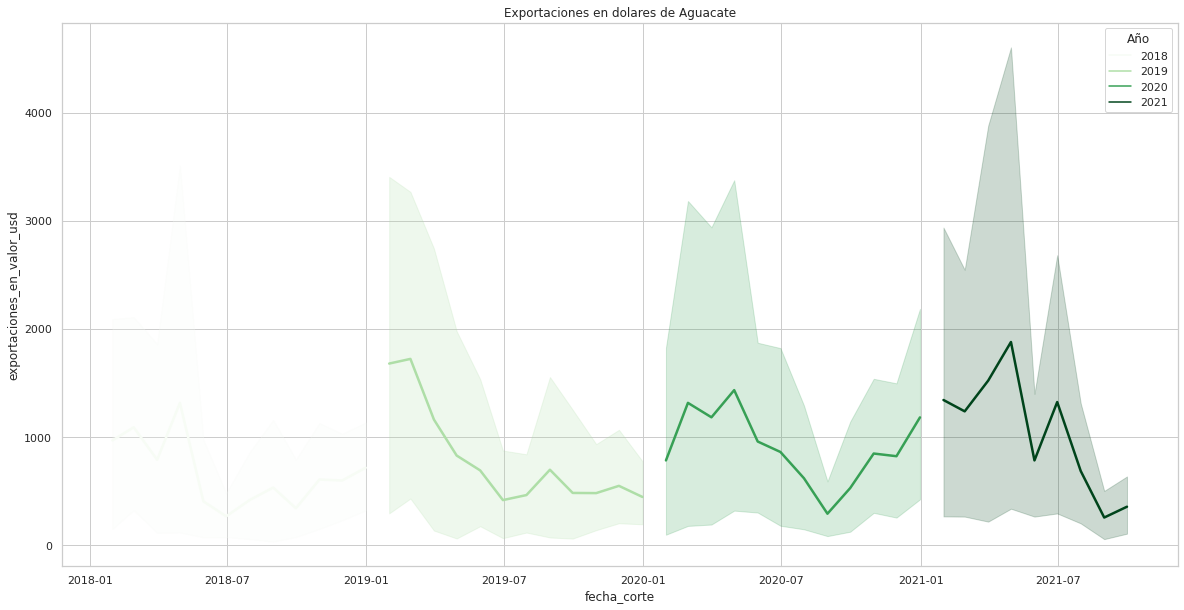

In [46]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
gr3 = sns.lineplot(x= 'fecha_corte',y = 'exportaciones_en_valor_usd' ,data=Aguacate, palette="Greens", linewidth=2.5, hue = 'Año')
plt.title('Exportaciones en dolares de Aguacate')
plt.show()

Las gráficas anteriores muestra el seguimiento en dolares y en toneladas de Aguacate exportados, en cada año se muestra una caida durante el segundo semestre sin embargo la cantidad de picos muestra tendencia al aumento conforme va pasando el tiempo

PROCESAMIENTO DE TEXTOS

¿De que producto quieres Aprender

In [50]:
Var = input('Ingrese alguna palabra clave sobre algún producto:\n')
Custom = df[df.producto.str.contains(Var)]
Custom1 = pd.pivot_table(data = Aguacate, index = 'Mes', columns = 'Año', values = 'exportaciones_en_volumen', aggfunc= np.sum ).reset_index()
Custom1['Variación 2021'] = round(((Custom1[2021]-Custom1[2020])/Custom1[2020])*100,2)
Custom1['Variación 2020'] = round(((Custom1[2020]-Custom1[2019])/Custom1[2019])*100,2)
Custom1['Variación 2019'] = round(((Custom1[2019]-Custom1[2018])/Custom1[2018])*100,2)
print('El ánalisis se va a realizar sobre:')
print(Custom.groupby(['producto'])[['exportaciones_en_volumen']].sum())


Ingrese alguna palabra clave sobre algún producto:
guacat
El ánalisis se va a realizar sobre:
          exportaciones_en_volumen
producto                          
Aguacate                    221728


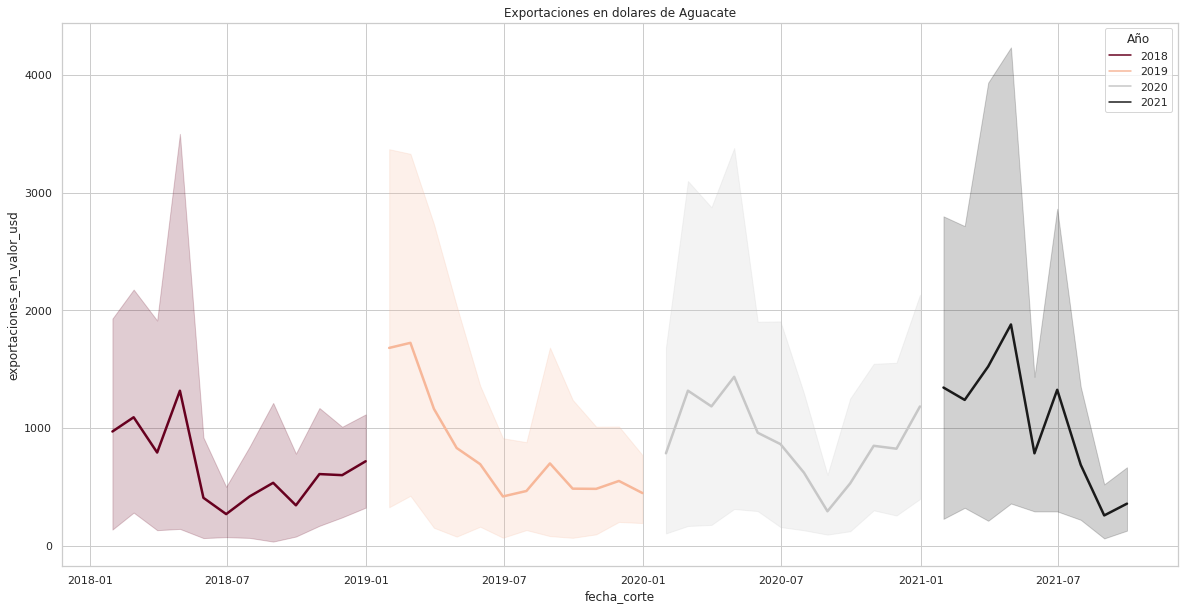

Año  Mes    2018    2019     2020     2021  Variación 2021  Variación 2020  \
0      1  3495.0  4833.0   4622.0  10805.0          133.77           -4.37   
1      2  3916.0  6017.0   6870.0   7744.0           12.72           14.18   
2      3  2606.0  5604.0   5505.0   9890.0           79.65           -1.77   
3      4  3942.0  4368.0   7734.0  12955.0           67.51           77.06   
4      5  1916.0  3193.0   5617.0   6647.0           18.34           75.92   
5      6  1268.0  3073.0   5989.0   8795.0           46.85           94.89   
6      7  1645.0  2699.0   4573.0   6817.0           49.07           69.43   
7      8  2069.0  3712.0   3912.0   2491.0          -36.32            5.39   
8      9  1595.0  2266.0   6630.0   3918.0          -40.90          192.59   
9     10  2659.0  2821.0   7661.0      NaN             NaN          171.57   
10    11  2740.0  2773.0   7961.0      NaN             NaN          187.09   
11    12  2161.0  3216.0  10005.0      NaN             NaN      

In [51]:
Name = Custom.loc[Custom.index[0],'producto']
Name = 'Exportaciones en dolares de '+Name
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
gr3 = sns.lineplot(x= 'fecha_corte',y = 'exportaciones_en_valor_usd' ,data=Custom, palette="RdGy", linewidth=2.5, hue = 'Año')
plt.title( Name)
plt.show()
print(Custom1)
print(Custom1.sum())

Graficar una misma variable con diferentes muestreos en el tiempo (resample). Observar si se mantienen las propiedades de la variable al graficarlas muestreando por hora, día, mes, año, etc.

In [52]:
Cafe = df[df['producto']=='Café']

In [53]:
Cafe.index = Cafe['fecha_corte']

In [54]:
highs = Cafe['exportaciones_en_valor_usd'].resample('m').max()##m es mes - LOS MAXIMOS POR MES - TENER EN CUENTA QUE LA FECHA ES EL INDICE

En general las exportacion de café se dan al final de cada mes


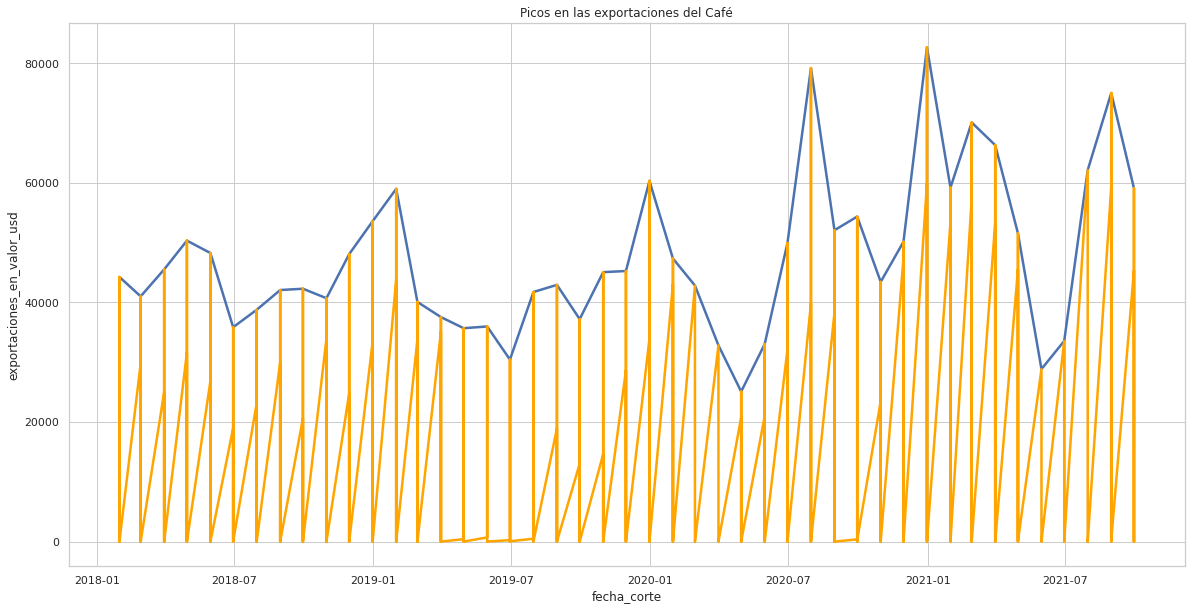

fecha_corte
2018-01-31    44241
2018-02-28    41006
2018-03-31    45510
2018-04-30    50325
2018-05-31    48246
2018-06-30    35850
2018-07-31    38753
2018-08-31    42061
2018-09-30    42280
2018-10-31    40696
2018-11-30    48066
2018-12-31    53577
2019-01-31    58980
2019-02-28    40070
2019-03-31    37536
2019-04-30    35678
2019-05-31    35970
2019-06-30    30434
2019-07-31    41731
2019-08-31    42925
2019-09-30    37191
2019-10-31    45054
2019-11-30    45243
2019-12-31    60309
2020-01-31    47327
2020-02-29    42817
2020-03-31    32812
2020-04-30    25083
2020-05-31    33032
2020-06-30    49920
2020-07-31    79172
2020-08-31    52062
2020-09-30    54340
2020-10-31    43426
2020-11-30    50126
2020-12-31    82631
2021-01-31    59186
2021-02-28    70078
2021-03-31    66284
2021-04-30    51534
2021-05-31    28843
2021-06-30    33550
2021-07-31    62122
2021-08-31    75004
2021-09-30    59068
Freq: M, Name: exportaciones_en_valor_usd, dtype: int64


In [55]:
print('En general las exportacion de café se dan al final de cada mes')
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.lineplot(data=highs, palette = 'icefire_r', linewidth=2.5)
plt.plot('fecha_corte', 'exportaciones_en_valor_usd' , color = 'orange',data=Cafe, linewidth=2.5)
plt.title('Picos en las exportaciones del Café')
#plt.annotate("Las exportaciones de Cafe se llevan a cabo al final de cada Mes",xytext=(2019-01,0),xy=(2019-01-01,0))
plt.show()
print(highs)

In [56]:
base2 = 'https://raw.githubusercontent.com/Nazch1994/Bases/main/colombia-departamentos-geo.csv'
Colombia = pd.read_csv(base2, sep= ";")

In [57]:
Colombia

,"DIVIPOLA 2011 (VIVIENDAS, HOGARES Y PERSONAS 2005)",Clase,Departamento,Municipio,Nombre centro,Tipo,Manzanas,Viviendas,Hogares,Personas,Grados,Minutos,Segundos,Latitud,grados,minutos,segundos,Longitud,geo_point
0,270012060,2,CHOCO,QUIBDO,VILLA DEL ROSARIO,C,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.00000,NaN,NaN
1,270012061,2,CHOCO,QUIBDO,WINANDO,C,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.00000,NaN,NaN
2,270012063,2,CHOCO,QUIBDO,BARRANCO,CP,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.00000,NaN,NaN
3,500012019,2,META,VILLAVICENCIO,APIAY,CP,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.00000,NaN,NaN
4,53682003,2,ANTIOQUIA,JERICO,LA CASCADA,CAS,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.00000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,192562046,2,CAUCA,EL TAMBO,LA CUCHILLA,IPD,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.00000,NaN,NaN
10349,202381000,1,CESAR,EL COPEY,EL COPEY,CM,431.0,3820.0,3815.0,18135.0,-73.0,57.0,37.201471,NaN,10.0,9.0,0.04545,10.150013,"-73.960333742,10.1500126249"
10350,258733000,3,CUNDINAMARCA,VILLAPINZON,VILLAPINZON,R,0.0,2875.0,2523.0,10967.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.00000,NaN,NaN
10351,253683000,3,CUNDINAMARCA,JERUSALEN,JERUSALEN,R,0.0,666.0,569.0,2043.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.00000,NaN,NaN


In [58]:
!pip install git+git://github.com/sckott/pygbif.git#egg=pygbif
!apt install python3-rtree
!pip install descartes
from shapely.geometry import Point, Polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning git://github.com/sckott/pygbif.git to /tmp/pip-install-wps6cvp2/pygbif_2fb91fbc629c4e4bb502295f3d36b033
  Running command git clone -q git://github.com/sckott/pygbif.git /tmp/pip-install-wps6cvp2/pygbif_2fb91fbc629c4e4bb502295f3d36b033
  fatal: unable to connect to github.com:
  github.com[0: 192.30.255.112]: errno=Connection timed out

ERROR: Could not find a version that satisfies the requirement pygbif (unavailable) (from versions: 0.1.1, 0.1.2, 0.1.4, 0.2.0, 0.3.0, 0.4.0, 0.5.0, 0.6.0)
ERROR: No matching distribution found for pygbif (unavailable)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspa

In [59]:
!wget https://sites.google.com/site/seriescol/shapes/depto.zip
!unzip /content/depto.zip -d "/content/"
Departamentos = gpd.read_file('/content/depto.shp')

--2022-06-16 03:06:45--  https://sites.google.com/site/seriescol/shapes/depto.zip
Resolving sites.google.com (sites.google.com)... 74.125.142.102, 74.125.142.138, 74.125.142.113, ...
Connecting to sites.google.com (sites.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://sites.google.com/site/seriescol/shapes/depto.zip?attredirects=0 [following]
--2022-06-16 03:06:45--  https://sites.google.com/site/seriescol/shapes/depto.zip?attredirects=0
Reusing existing connection to sites.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://933dc371-a-62cb3a1a-s-sites.googlegroups.com/site/seriescol/shapes/depto.zip?attachauth=ANoY7cqI9OWtXlCT3ijMqNcG_ouWc6oA5V5jZgNC-QI4DwiInsMp2oTWP8gi02DHydH69720owgg-uGwnEtq-btHFc2UrdJ5nN33nRHmSKHpDv1iJKuHclCH7xxpYmSZ1YZupVUbwU_LKvdS_1VQCHfsrSn1Mqm41FmPL9TqndWHN6lDzj15hwUp32IDFG6AZWoetqa723MDkNkinLMHAK1oQDDOf1ZJeA%3D%3D&attredirects=0 [following]

ANALISIS DE LAS EXPORTACIONES TRADICIONALES Y NO TRADICIONALES DEL AÑO 2020

In [60]:
dftradicional = df[df['Año']==2020].groupby(['departamento','tradici_n_producto'])[['exportaciones_en_valor_usd','exportaciones_en_volumen']].sum().reset_index()

In [61]:
dftradicional.columns = ['Departamento', 'Tradicion_producto', 'exportaciones_en_valor_usd','exportaciones_en_volumen']

Departamento                  AmazonasAntioquiaAntioquiaAtlánticoAtlánticoBo...
Tradicion_producto            No tradicionalNo tradicionalTradicionalNo trad...
exportaciones_en_valor_usd                                              7856040
exportaciones_en_volumen                                                5644042
dtype: object


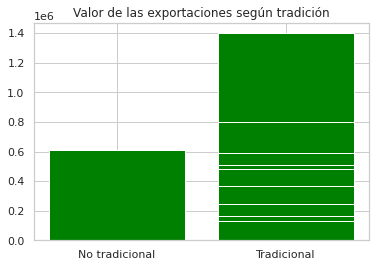

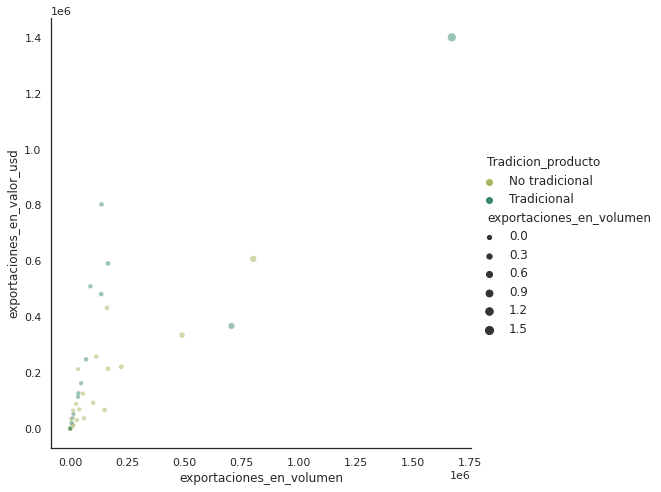

In [62]:
plt.subplot()
plt.title('Valor de las exportaciones según tradición')
gr5 = plt.bar(dftradicional["Tradicion_producto"],dftradicional["exportaciones_en_valor_usd"], color = 'green')
print(dftradicional.sum())
sns.set_theme(style="white")
sns.relplot(height= 7, x="exportaciones_en_volumen", y="exportaciones_en_valor_usd", hue="Tradicion_producto",
            alpha=.5, palette="gist_earth_r", data=dftradicional, size='exportaciones_en_volumen')
plt.show()

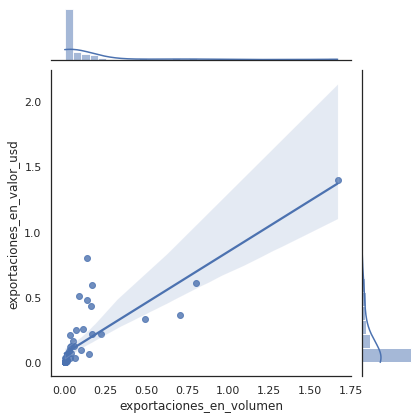

In [63]:
dftradicional['exportaciones_en_valor_usd'] = dftradicional['exportaciones_en_valor_usd']/1000000
dftradicional['exportaciones_en_volumen'] = dftradicional['exportaciones_en_volumen']/1000000
sns.jointplot(x='exportaciones_en_volumen',y = 'exportaciones_en_valor_usd',data = dftradicional, kind = 'reg')
plt.show()

In [64]:
dftradicional.sort_values(by='exportaciones_en_volumen', ascending=False)

,Departamento,Tradicion_producto,exportaciones_en_valor_usd,exportaciones_en_volumen
2,Antioquia,Tradicional,1.399550,1.671064
47,Valle del Cauca,No tradicional,0.607172,0.801834
28,Magdalena,Tradicional,0.367440,0.706197
27,Magdalena,No tradicional,0.334806,0.489544
3,Atlántico,No tradicional,0.221526,0.223679
7,Bolívar,No tradicional,0.214822,0.166211
12,Caldas,Tradicional,0.590951,0.166068
1,Antioquia,No tradicional,0.432279,0.161542
15,Cauca,No tradicional,0.067007,0.151122
6,Bogotá,Tradicional,0.802256,0.137466


Antioquia es el departamento que más exportó en el sector agropecuario durante el 2020. 

In [65]:
dftradicional['exportaciones_en_volumen'].max() ##antioquia

1.671064

In [66]:
dftradicional = dftradicional.drop([2],axis=0)##borrar antioquia

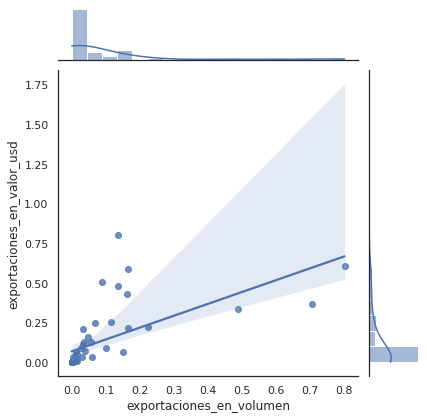

In [67]:
sns.jointplot(x='exportaciones_en_volumen',y = 'exportaciones_en_valor_usd',data = dftradicional, kind = 'reg')
plt.show()

In [68]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [69]:
df.head()

,fecha,fecha_corte,a_o,mes,departamento,cod_depto,producto,descripcion_partida4_dig,descripcion_partida4_dig_1,partida,tradici_n_producto,exportaciones_en_valor_usd,exportaciones_en_volumen,Mes,Año
0,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Caballos,"0101-Caballos, asnos, mulos y burdéganos, vivos.","Caballos reproductores de raza pura, vivos",101210000,No tradicional,9,2,1,2018
1,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Porcinos,0103-Animales vivos de la especia porcina.,Animales vivos de la especie porcina de raza p...,103920000,No tradicional,0,0,1,2018
2,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Animales vivos,0106-Los demás animales vivos.,Los demás mamíferos vivos,106190000,No tradicional,150,4,1,2018
3,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Carne bovina y despojos,"0201-Carne de animales de la especie bovina, f...",Cortes finos de carne de animales de la especi...,201300010,No tradicional,307,45,1,2018
4,2021-12-03,2018-01-31,2018,Enero,Antioquia,5,Carne bovina y despojos,"0201-Carne de animales de la especie bovina, f...",Las demás carnes de animales de la especie bov...,201300090,No tradicional,1077,256,1,2018


MAPAS COROPLÉCTICOS

In [70]:
df.groupby(['producto'])[['exportaciones_en_volumen']].count().sort_values(by=['exportaciones_en_volumen'], ascending=False)

,exportaciones_en_volumen
producto,
Preparaciones alimenticias -otras,3831
Leche y sus derivados,3604
Flores,2796
Cacao y sus preparaciones,2417
Café,2019
...,...
"Tilapias (oreochromis spp.), Bagres o pez gato (pangasius spp., silurus spp., clarias spp., ictalurus spp.), Carpas (cyrpinus carpio, carassius carassius, ctenopharyngodon idellus, hypophthalmichthys spp., cirrhinus spp., mylopharyngodon piceus), Anguilas",1
"Tortas y demás residuos sólidos de la extracción del aceite de maní o (cacahuete), cacahuetes,",1
"Higados , huevas y lechas de pescado frescos,refrigerados.",1


In [95]:
Article = 'Flores'

In [96]:
Custom2020 = df[df['Año']==2020]
Custom2020 = Custom2020[Custom2020['producto']==Article]

In [97]:
Custom2020 = Custom2020.groupby(['departamento'])[['exportaciones_en_volumen']].sum().reset_index()
Custom2020['departamento'] = Custom2020['departamento'].str.upper()

In [98]:
Departamentos.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((754872.146 1445316.567, 755882.980 1..."
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((913511.163 1637374.172, 912870.293 1..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((1006435.805 1021680.392, 1006048.264..."
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((881889.901 1644370.282, 882454.535 1..."
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((1206427.930 1268967.315, 1207191.680..."


In [99]:
DfDep = pd.merge(left = Departamentos, right = Custom2020, how = 'left', left_on = 'NOMBRE_DPT', right_on = 'departamento')
DfDep.fillna(0)
DfDep = DfDep.replace('Nan', 0)
DfDep

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,departamento,exportaciones_en_volumen
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6.335186e+06,"POLYGON ((754872.146 1445316.567, 755882.980 1...",ANTIOQUIA,58422.0
1,08,ATLANTICO,3.360765e+09,240936.172,3.360765e+05,"POLYGON ((913511.163 1637374.172, 912870.293 1...",NaN,NaN
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,1.650948e+05,"POLYGON ((1006435.805 1021680.392, 1006048.264...",NaN,NaN
3,13,BOLIVAR,2.614189e+10,1309427.968,2.614189e+06,"POLYGON ((881889.901 1644370.282, 882454.535 1...",NaN,NaN
4,15,BOYACA,2.335258e+10,1364539.911,2.335258e+06,"POLYGON ((1206427.930 1268967.315, 1207191.680...",NaN,NaN
5,17,CALDAS,7.558200e+09,603282.457,7.558200e+05,"POLYGON ((931978.603 1127612.742, 933119.333 1...",CALDAS,401.0
6,18,CAQUETA,9.018087e+10,1888506.901,9.018087e+06,"POLYGON ((931968.406 767660.187, 932356.113 76...",NaN,NaN
7,19,CAUCA,2.974279e+10,1243388.952,2.974279e+06,"MULTIPOLYGON (((540370.415 821285.843, 536207....",NaN,NaN
8,20,CESAR,2.297310e+10,1080343.678,2.297310e+06,"POLYGON ((1087325.026 1692140.333, 1087516.283...",NaN,NaN
9,23,CORDOBA,2.505949e+10,814093.372,2.505949e+06,"POLYGON ((809020.232 1533968.656, 810161.780 1...",NaN,NaN


Text(0.5, 1.0, 'Departamentos que exportan: Flores')

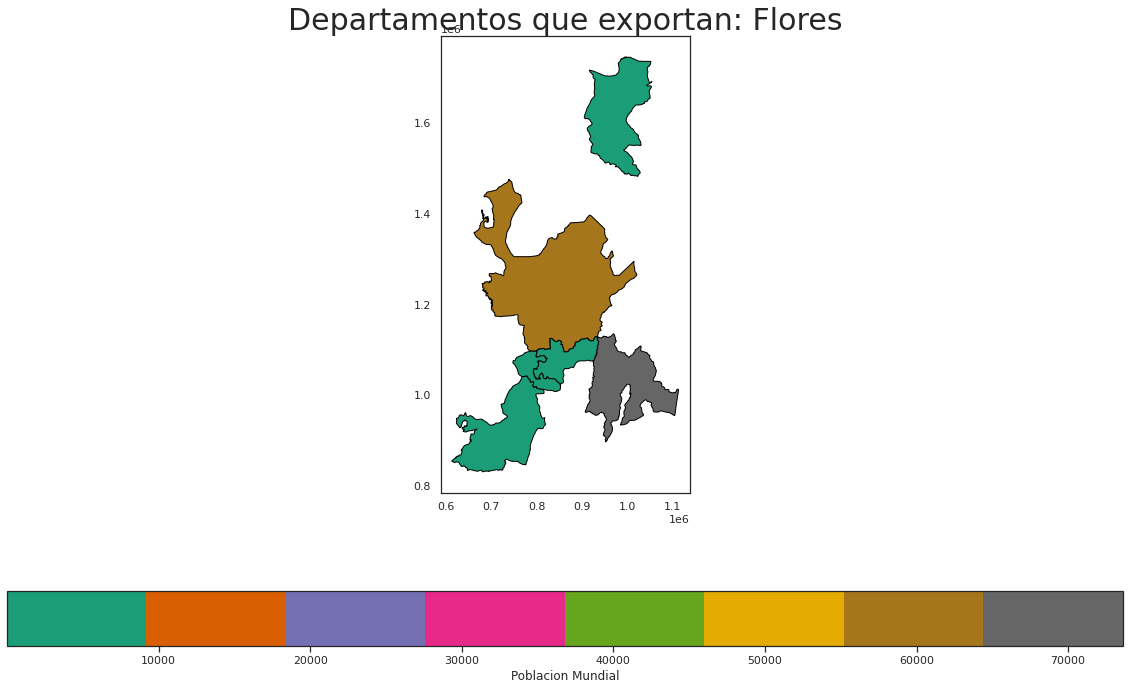

In [100]:
title = 'Departamentos que exportan: '+Article
DfDep.plot(column = 'exportaciones_en_volumen', figsize=(20,12), cmap = 'Dark2', edgecolor = 'black', legend = True,
           legend_kwds = {'orientation':'horizontal','label':'Poblacion Mundial'});##le9 es 10 elevadoa la 9, cmap cambia el tema
plt.title(title, size = 30)